In [80]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [81]:


ticker = "^NSEI"  # NIFTY 50 index on Yahoo Finance

end_date = datetime.today().strftime('%Y-%m-%d')

#Currently using the last 10 years data will use more for simulations
start_date = (datetime.today() - timedelta(days=3650)).strftime('%Y-%m-%d')  

nifty_data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

print("Fetched Data (first 5 rows):")
print(nifty_data.head())

csv_file = "nifty_50_10_years_data.csv"
nifty_data.to_csv(csv_file)


[*********************100%***********************]  1 of 1 completed

Fetched Data (first 5 rows):
Price         Adj Close        Close         High          Low         Open  \
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI        ^NSEI   
Date                                                                          
2014-12-09  8340.700195  8340.700195  8444.500000  8330.500000  8439.299805   
2014-12-10  8355.650391  8355.650391  8376.799805  8317.000000  8318.049805   
2014-12-11  8292.900391  8292.900391  8348.299805  8272.400391  8338.849609   
2014-12-12  8224.099609  8224.099609  8321.900391  8216.299805  8302.000000   
2014-12-15  8219.599609  8219.599609  8242.400391  8152.500000  8160.750000   

Price       Volume  
Ticker       ^NSEI  
Date                
2014-12-09  146300  
2014-12-10  136700  
2014-12-11  133900  
2014-12-12  138100  
2014-12-15  137100  


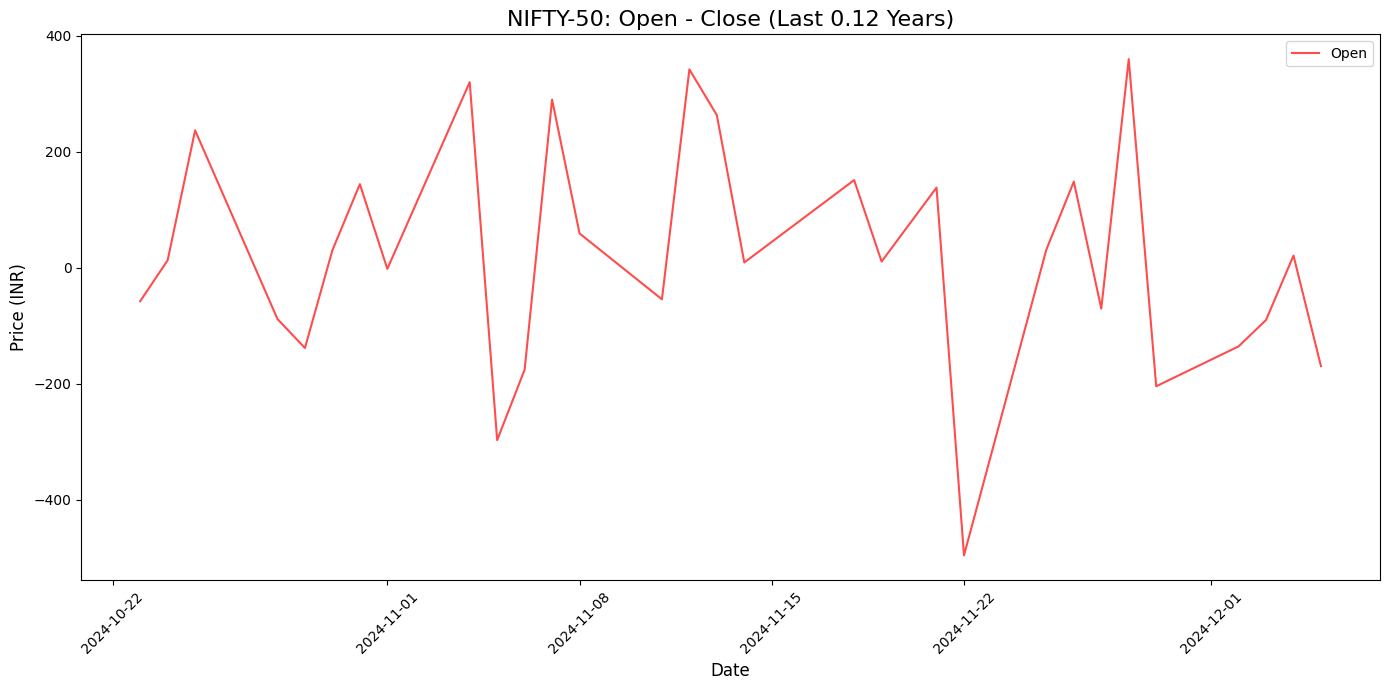

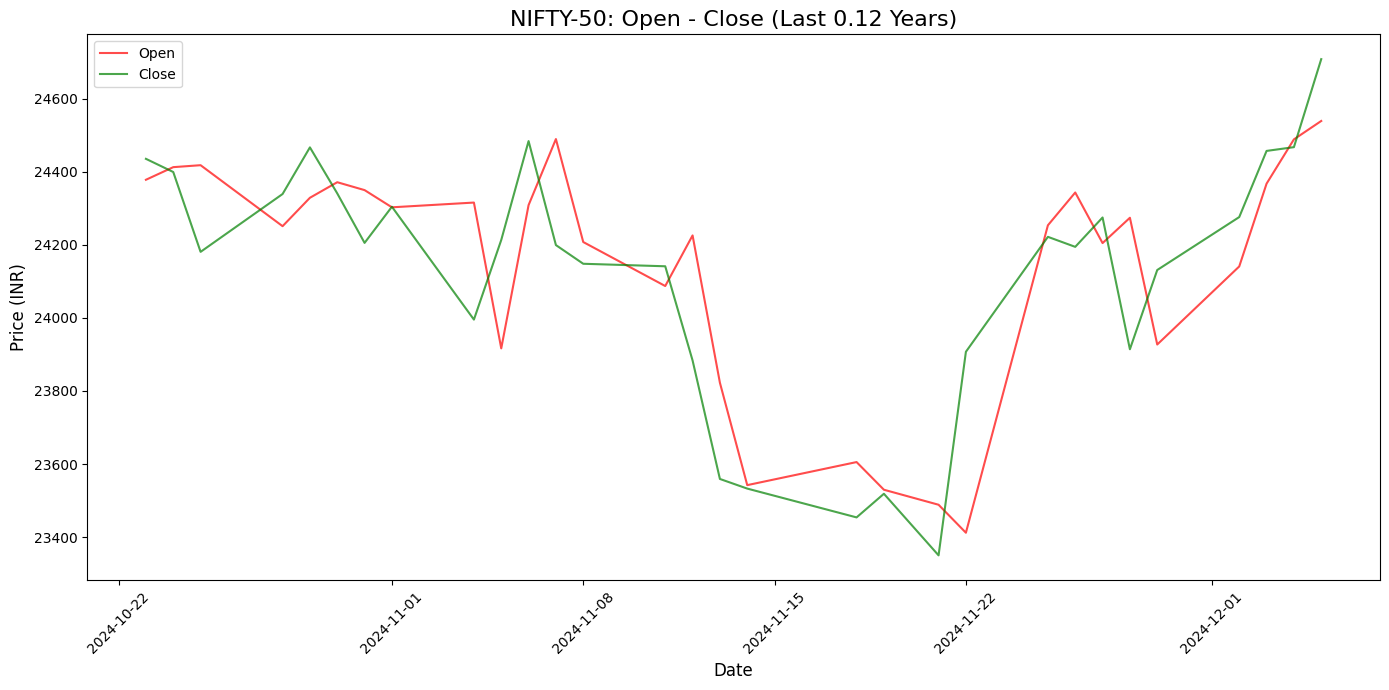

In [82]:

def plot_open_close(data, years=10):
    data = data.tail(int(years * 252))  
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Open']-data['Close'], label='Open', color='red', alpha=0.7)
    #plt.plot(data.index, data['Close'], label='Close', color='green', alpha=0.7)

    plt.title(f'NIFTY-50: Open - Close (Last {years} Years)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_open_and_close(data,years=10):
    data = data.tail(int(years * 252))  
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Open'], label='Open', color='red', alpha=0.7)
    plt.plot(data.index, data['Close'], label='Close', color='green', alpha=0.7)

    plt.title(f'NIFTY-50: Open - Close (Last {years} Years)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_open_close(nifty_data,0.12)
plot_open_and_close(nifty_data,0.12)
# PLOT LOOKS RANDOM FOR 0.12 YEARS IE 30 DAYS
# MY INITITAL ASSUMTION IS THAT FOR A GIVEN DAT ITS A COIN FLIP THAT SHARE WILL INCREASE OR DECREASE 
# ILL LOOK INTO THE FORMAL STATISTICAL PROOF LATER
   

In [83]:
nifty_data['open_close_diff'] = nifty_data['Close'] - nifty_data['Open']
nifty_data.tail(10)



Price,Adj Close,Close,High,Low,Open,Volume,open_close_diff
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,
Date,,,,,,,
2024-11-22,23907.250000,23907.250000,23956.099609,23359.000000,23411.800781,367600,495.449219
2024-11-25,24221.900391,24221.900391,24351.550781,24135.449219,24253.550781,687200,-31.650391
2024-11-26,24194.500000,24194.500000,24343.300781,24125.400391,24343.300781,230700,-148.800781
2024-11-27,24274.900391,24274.900391,24354.550781,24145.650391,24204.800781,295000,70.099609
2024-11-28,23914.150391,23914.150391,24345.750000,23873.349609,24274.150391,366700,-360.000000
2024-11-29,24131.099609,24131.099609,24188.449219,23927.150391,23927.150391,282100,203.949219
2024-12-02,24276.050781,24276.050781,24301.699219,24008.650391,24140.849609,220400,135.201172
2024-12-03,24457.150391,24457.150391,24481.349609,24280.000000,24367.500000,339500,89.650391


In [84]:
profits = [i for i in nifty_data['open_close_diff'] if i > 0]
losses = [i for i in nifty_data['open_close_diff'] if i < 0]

print(f'number of profitable days :  {len(profits)} \t total profit : {sum(profits)}')
print(f'number of lossy days : {len(losses)} \t total loss : {sum(losses)}')
print(f'total profit (diffrencing sum of profitable days and lossy dasy) : {sum(profits) - abs(sum(losses))}')
print()
initial_close = nifty_data.iloc[0]['Adj Close'].values[0]
final_close = nifty_data.iloc[-1]['Adj Close'].values[0]
print(f'initial close : {initial_close} \nfinal close : {final_close} \ndifference (total profit if just bought and held): {final_close - initial_close}')

# I see a intresting observation that 'close' of a day is not the same as 'open' of the next day

number of profitable days :  1147 	 total profit : 81892.17578125
number of lossy days : 1310 	 total loss : -105938.67431640625
total profit (diffrencing sum of profitable days and lossy dasy) : -24046.49853515625

initial close : 8340.7001953125 
final close : 24708.400390625 
difference (total profit if just bought and held): 16367.7001953125


In [ ]:
# To address this, we calculate the change in price between trading days by taking the difference 
# between Open[i] and Close[i-1]. This is referred to as 'overnight change,' as it reflects the 
# price movement that occurs outside regular trading hours in the daily data.



nifty_data['overnight change'] = nifty_data['Open'] - nifty_data['Close'].shift(1)

nifty_data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,open_close_diff,overnight change
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,
Date,,,,,,,,
2014-12-09,8340.700195,8340.700195,8444.500000,8330.500000,8439.299805,146300,-98.599609,NaN
2014-12-10,8355.650391,8355.650391,8376.799805,8317.000000,8318.049805,136700,37.600586,-22.650391
2014-12-11,8292.900391,8292.900391,8348.299805,8272.400391,8338.849609,133900,-45.949219,-16.800781
2014-12-12,8224.099609,8224.099609,8321.900391,8216.299805,8302.000000,138100,-77.900391,9.099609
2014-12-15,8219.599609,8219.599609,8242.400391,8152.500000,8160.750000,137100,58.849609,-63.349609
2014-12-16,8067.600098,8067.600098,8189.350098,8052.600098,8172.600098,197300,-105.000000,-46.999512
2014-12-17,8029.799805,8029.799805,8082.000000,7961.350098,8041.200195,216200,-11.400391,-26.399902
2014-12-18,8159.299805,8159.299805,8174.299805,8084.899902,8138.899902,162100,20.399902,109.100098


In [ ]:


profit_due_to_overnightChange = nifty_data['overnight change'].sum()
print(f'profit due to overnight change : {profit_due_to_overnightChange}')

total_profit = sum(profits) + abs(sum(losses)) + profit_due_to_overnightChange
print(f'total profit : {total_profit}')
print(f'total profit (total profit if just bought and held) : {final_close - initial_close}')



# Observing the data, it is evident that a daily trading strategy—buying at market open 
# and selling at market close—would have yielded higher profits compared to a simple 
# buy-and-hold strategy over the same period.

# We will now update our base strategy to implement this daily trading approach, 
# which results in a total profit of [228146.44921875].


profit due to overnight change : 40315.59912109375
total profit : 228146.44921875
total profit (total profit if just bought and held) : 16367.7001953125
